# Students Mental Health Analysis

**Nikhil Sharma** <br>Center for computer and Communication Technology, Chisopani, Sikkim

### Abstract

This paper identifies several serious problems with the widespread mental condition of students for the analysis of categorical outcome variables such as Depression, Marital Status, Anxiety , Panic Attack, et cetera. I show that even after applying the multiple Machine Learning classifier framework  to proportional data, the shortage of data can yield spurious results. I discuss conceptual issues underlying these problems and alternatives provided by modern statistics and visualization. Specifically, I introduce multiple legit models (i.e. Logistic Regression, Decision Tree, Random Forest, S.V.C.), which are well-suited to analyze categorical data and offer many advantages. Throughout the paper, I use a psycholinguistic data set to compare the different statistical methods.

#### Keywords:

Data Analytics,Hypothesis, Student, mental health, modelling

### 1. Introduction:

Mental health problems can affect many areas of students’ lives, reducing their quality of life, academic achievement, physical health, and satisfaction with the college experience, and negatively impacting relationships with friends and family members. These issues can also have long-term consequences for students, affecting their future employment, earning potential, and overall health. [[1]](#Section_1)

Students from different courses, ages and years may experience mental breakdown at some point in their life. Few aspects are: [[2]](#Section_2)<br>
###### 1.1 Anxiety
According to Wikipedia, Anxiety is an emotion which is characterized by an unpleasant state of inner turmoil and includes feelings of dread over anticipated events. It is often accompanied by nervous behavior such as pacing back and forth, somatic complaints, and rumination. Anxiety often have the following symptoms:[[3]](#Section_3)

* Disproportionate feelings of nervousness, restlessness, or tension
* An impending sense of doom, danger, or panic without any cause
* Hyperventilating
* Trembling or sweating
* Weakness and fatigue
* Insomnia or difficulty falling asleep
* Problems with appetite (not eating enough or binge eating)
* Nausea or migraines

###### 1.2 Depression
According to Wikipedia, Classified medically as a mental and behavioral disorder, the experience of depression affects a person's thoughts, behavior, motivation, feelings, and sense of well-being. Depression symptoms include:

* Consistent feelings of hopelessness and sadness.
* Mood swings.
* Changes in sleep and/or appetite.
* Withdrawal from social circles, a tendency to self-isolate.
* Increased pessimism.
* Feeling Lathargic.
* Difficulty concentrating and completing tasks.
* Lack of enjoyment in activities one previously found pleasurable.
<br>

###### 1.3 Panic Attack
According to Wikipedia, Panic attacks are sudden periods of intense fear and discomfort that may include palpitations, sweating, chest pain or chest discomfort, shortness of breath, trembling, dizziness, numbness, confusion, or a feeling of impending doom or of losing control. Typically, symptoms reach a peak within ten minutes of onset, and last for roughly 30 minutes, but the duration can vary from seconds to hours.

###### 1.4 Why do students suffer from poor mental health?
There are several reasons why students may suffer from poor mental health.  [[6]](#Section_6)

* Bullying
* Peer pressure
* Family issues
* Toxic relationships
* Lack of sleep
* Poor diet
* Lack of exercise<br>

Well, in most cases students are usually overburdened with academics and assignments. The amount of stress this causes will definitely have a negative impact on their mental health.

On the other hand, some students tend to be very competitive and sometimes want to outshine everyone else. Thus, they would feel pressured to get good grades even at the expense of their friends or not doing the assignment themselves.

Such students often develop depression due to increased stress levels. Lastly, it is normal for students to experience feelings of worthlessness once they fail an exam or lose a competition.

This can also lead them to depression as most teenagers may go through this phase at one time or another during their life in school. 

This particular dataset involves a survey conducted in an University. Let's have a close look at it!

### 2. Data Understanding and Source:

A STATISTICAL RESEARCH ON THE EFFECTS OF MENTAL HEALTH ON STUDENTS’ CGPA dataset <br>
This Data set was collected by a survey conducted by Google forms from University student in order to examine their current academic situation and mental health. [View Dataset](https://www.kaggle.com/datasets/shariful07/student-mental-health)

### 3. Data Preparation:

This section provides insight into the business problems before performing data modeling. The data preparation phase include activities, such as data selection, data transformation, data cleaning and data validation. Data preparation tasks may be performed several times and not in any given order. During this phase important issues are addressed like selecting the relevant data, cleaning of data, discarding unacceptable data and how the ERP system data can be integrated into the ﬁnal data sets.

###### 3.1 Importing Libraries

In [1]:
#make sure you have installed the libraries before importing them

import numpy as np
import pandas as pd
import scipy.stats as st 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

###### 3.2 Reading and understanding our data

For this Analysis, we will be using the Students_mental_health.csv file.


Let's read the data into pandas data frame and look at the first 5 rows using the head() method.

In [2]:
df = pd.read_csv('data/Student_mental_health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


By using `info` function, we will take a look at our types of data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

According to the output above, we have 101 entries or rows, as well as 11 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 101 then there is no missing values for that particular feature. The 'Did You seek any specialist for a treatment' is our target, or response variable, and the rest of the features are our predictor variables.

We also have a mix of numerical (1 float64) and object data types (10 object).

In [4]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

From Above info, we can deduce that:

* `Age` column has a value missing.
* `Timestamp` is not parsed as a DateTime object, but we can work with that as the data was collected on same day.
* `What is your course?, Your current year of Study , and What is your CGPA?` is in object datatype that we need futher exploration.
* `All Other Columns` have Yes/ NO value that need further preparation and exploration.

Let's Rename our Column to make our `dataframe` easier to understand

In [5]:
#Rename columns
df.columns = ['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
df.head()

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Let's check the mean value of age to replace the missing values.

In [6]:
df.Age.describe()

count    100.00000
mean      20.53000
std        2.49628
min       18.00000
25%       18.00000
50%       19.00000
75%       23.00000
max       24.00000
Name: Age, dtype: float64

In [7]:
#Precisely checking the sum of null values in Age feature.
df.Age.isnull().sum()

1

In [8]:
#Replacing the Null Value with mean of Age - 20.53
#I rounded up the value to 21.
df.Age.fillna(21, inplace=True)
df.Age.isnull().sum()

0

In [9]:
#No Missing and Null Values anymore.
df.isnull().sum()

Date_Time         0
Gender            0
Age               0
Course            0
Year              0
CGPA              0
Marital_Status    0
Depression        0
Anxiety           0
Panic_Attack      0
Treatment         0
dtype: int64

Let's breakdown the Year column and bring it in clean format

In [10]:
#Formatting the Year column
df['Year'].unique().tolist()

['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2', 'Year 3']

With above info, we can say that:

* The maximum duration of any particular course is 4 years as per the data. The minimum duration cannot be determined.
* Year 1 and year 1 mean the same thing (and same with other values) yet are interpreted as different.
* No need of the word 'Year' or 'year', we can work with just the number by cleaning the text.

In [11]:
def cleanText(text):
    text = text[-1]
    text = int(text)
    return text
df["Year"] = df["Year"].apply(cleanText)
print("First 5 value after Cleaning the text of Year Column")
print(df["Year"][:5], "\n")

First 5 value after Cleaning the text of Year Column
0    1
1    2
2    1
3    3
4    4
Name: Year, dtype: int64 



Let's check the CGPA column in our dataframe.

In [12]:
df['CGPA'].unique().tolist()

['3.00 - 3.49',
 '3.50 - 4.00',
 '3.50 - 4.00 ',
 '2.50 - 2.99',
 '2.00 - 2.49',
 '0 - 1.99']

With above info, we can say that:

* The CGPA column has ranges rather than an absolute value.
* The range '3.50 - 4.00' is same as '3.50 - 4.00 ', so we need to trim the trailing whitespace.
* The ranges can be converted to their mean values, but I will keep them as it is for further exploration.

In [13]:
def remove_space(delimstrng):
    delimstrng = delimstrng.strip()
    return delimstrng
df["CGPA"] = df["CGPA"].apply(remove_space)
print("First five values of CGPA after cleaning the space from CGPA column:")
print(df["CGPA"][:5], "\n")
print(df['CGPA'].unique().tolist())

First five values of CGPA after cleaning the space from CGPA column:
0    3.00 - 3.49
1    3.00 - 3.49
2    3.00 - 3.49
3    3.00 - 3.49
4    3.00 - 3.49
Name: CGPA, dtype: object 

['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99']


Now lets see the list of courses that students have enrolled and total number of courses:

In [14]:
course_list = df['Course'].unique().tolist()
print(course_list,'\n','\n','Number Of courses -',len(course_list))

['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics', 'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs', 'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science', 'KOE', 'Banking Studies', 'Business Administration', 'Law', 'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA', 'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS', 'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ', 'Biotechnology', 'Communication ', 'Diploma Nursing', 'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ', 'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ', 'Pendidikan Islam'] 
 
 Number Of courses - 49


 We can see there are multiple courses with different name but there meaning and reference is same. For Eg. - `Engine`,`Engin`, and `Engineer` means the same.

In [15]:
#Let's replace redundant course name with the standard course name
df['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'} , inplace = True)

In [16]:
#New List of Courses with List Count
course_list = df['Course'].unique().tolist()
print(course_list,'\n\n','Number Of courses -',len(course_list))

['Engineering', 'Islamic Education', 'IT', 'Law', 'Mathemathics', 'Pendidikan Islam', 'BCS', 'Human Resources', 'Irkhs', 'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science', 'KOE', 'Banking Studies', 'Business Administration', 'Usuluddin ', 'TAASL', 'ALA', 'Biomedical science', 'Koe', 'BENL', 'CTS', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ', 'Biotechnology', 'Communication ', 'Diploma Nursing', 'Pendidikan Islam ', 'Radiography', 'Fiqh', 'DIPLOMA TESL', 'Nursing '] 

 Number Of courses - 37


Before Moving to Data Exploration let's check how our updated dataframe look like:

In [17]:
df.head()

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,IT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


### 4. Data Exploration

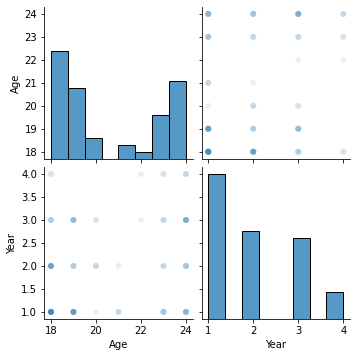

In [18]:
sns.pairplot(df, plot_kws=dict(alpha=.1, edgecolor='none',))

With this Visualization, We can say that:
* There are no Outliers in the `Year` and `Age`.
* This Visualization is not enough for our analysis and we need further exploration

In [19]:
course_per_student = df.Course.value_counts()
course_per_student

Engineering                20
BCS                        18
IT                         11
Biomedical science          4
KOE                         4
Law                         3
BENL                        3
Irkhs                       3
Psychology                  3
Pendidikan Islam            2
Fiqh                        2
Koe                         2
Islamic Education           2
Human Sciences              1
Malcom                      1
Kop                         1
Diploma Nursing             1
Biotechnology               1
Communication               1
Econs                       1
Pendidikan Islam            1
Radiography                 1
DIPLOMA TESL                1
MHSC                        1
TAASL                       1
CTS                         1
ALA                         1
Usuluddin                   1
Business Administration     1
Banking Studies             1
Marine science              1
ENM                         1
Accounting                  1
KENMS     

Let's plot the countplot of students in each course respective to the year they are studying:

Text(0.5, 1.0, 'Student Count for Year 1')

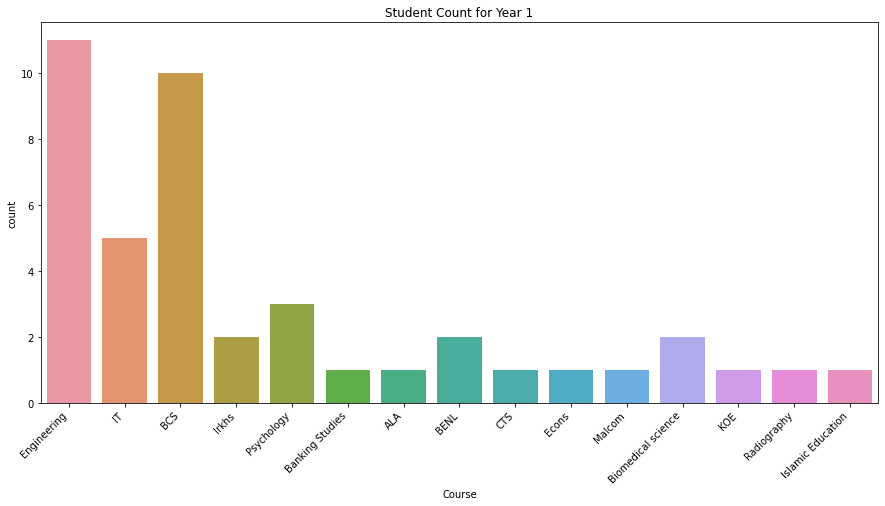

In [20]:
#Using SNS's plotting functionality
#Countplot for First Year

plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = df[df['Year'] == 1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Student Count for Year 1')

Text(0.5, 1.0, 'Student Count for Year 2')

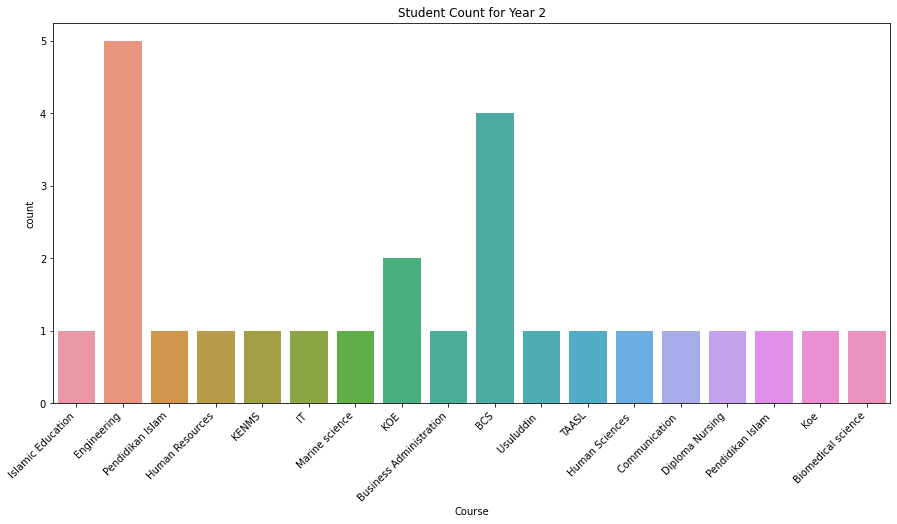

In [21]:
#Using SNS's plotting functionality
#Countplot for Second Year

plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = df[df['Year'] == 2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Student Count for Year 2')

Text(0.5, 1.0, 'Student Count for Year 3')

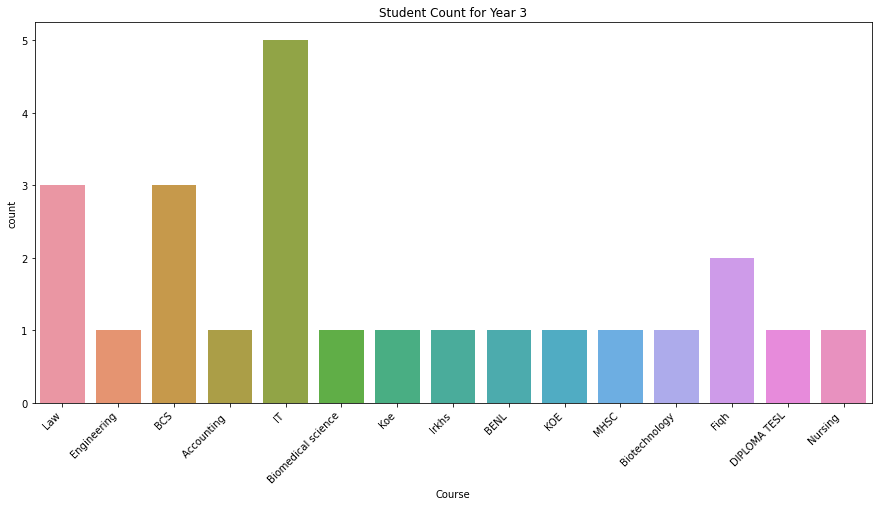

In [22]:
#Using SNS's plotting functionality
#Countplot for Third Year

plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = df[df['Year'] == 3])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Student Count for Year 3')

Text(0.5, 1.0, 'Student Count for Year 4')

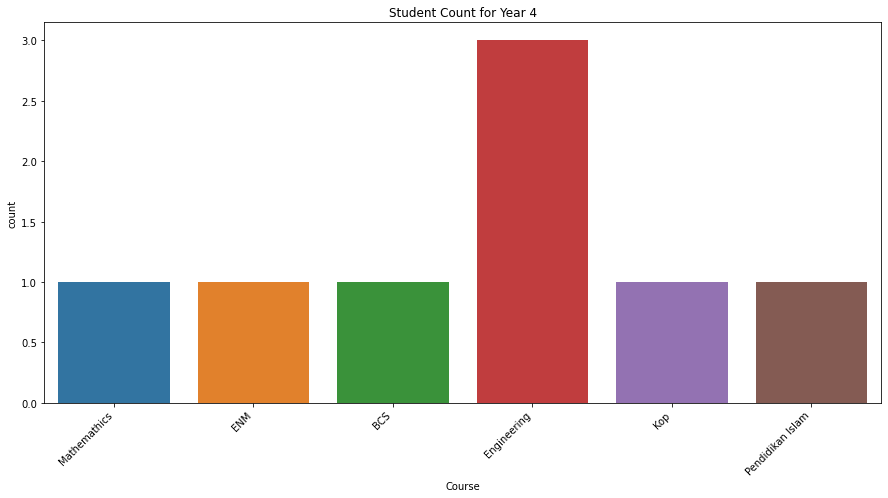

In [23]:
#Using SNS's plotting functionality
#Countplot for Fourth Year

plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = df[df['Year'] == 4])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Student Count for Year 4')

###### 4.1 Year-wise analysis of students from different courses 

With above info, we can say that:    
* Maximum students are from Engineering. Except in Year 3 the Engineering students have maximum value in every respective year.
* Missing Courses from the Year 4 (x-axis) must have a course duration of 3 years.
* Engineering, BCS and IT students rule the survey with maximum number of responses
* Majority of survey is from engineering students.

In [24]:
df.Anxiety.value_counts()

No     67
Yes    34
Name: Anxiety, dtype: int64

There are 34 students who have anxiety. Let's plot it respective to each courses.

Text(0.5, 1.0, 'Anxiety VS Courses')

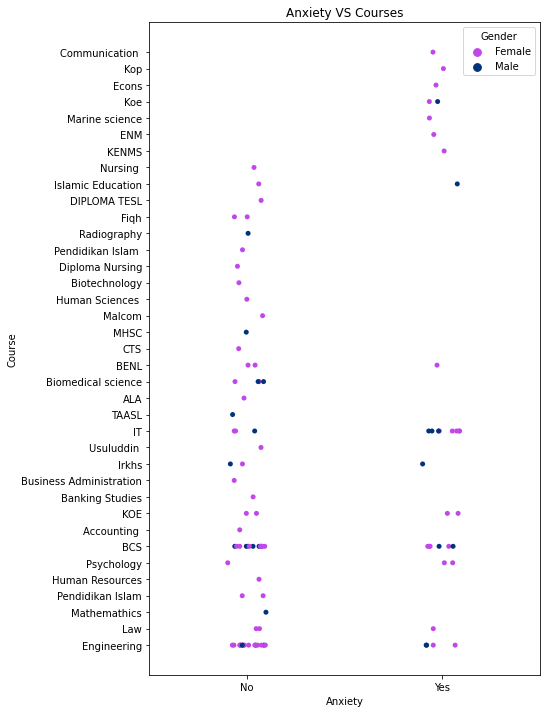

In [25]:
#Strip-plot for Anxiety respective to each courses
plt.figure(figsize=(7, 12))
ax = sns.stripplot(data= df, x = 'Anxiety', y = 'Course', hue = 'Gender',palette = ['#C147E9', '#00337C'])
ax.set_title('Anxiety VS Courses')

**Anxiety vs Course**

Here are some of the stats:
* Students enrolled in IT experience the maximum anxiety.
* Students enrolled in fields related to Islam(Islamic Education, Pendidikan Islam, Fiqh, Usuluddin, etc.) and Biology(Human * Sciences, Nursing, Biomedical Sciences) are less prone to anxiety.
* Computer Science(BCS) has almost an equal number of students who experience anxiety and those who not

In [26]:
df.Depression.value_counts()

No     66
Yes    35
Name: Depression, dtype: int64

There are 35 students having depression. Let's Plot and check which course have more student's suffering from Depression.

Text(0.5, 1.0, 'Depression VS Courses')

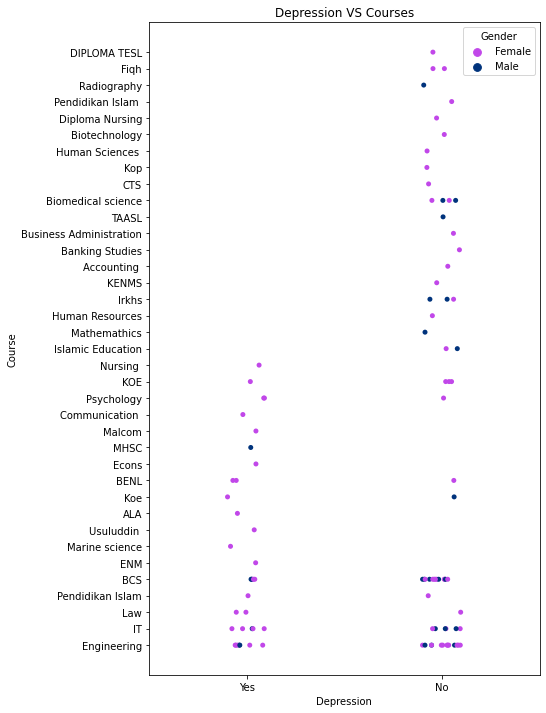

In [27]:
plt.figure(figsize=(7, 12))
ax = sns.stripplot(data= df, x = 'Depression', y = 'Course', hue = 'Gender',palette = ['#C147E9', '#00337C'])
ax.set_title('Depression VS Courses')

In [28]:
df.Depression.groupby(df['Gender']).value_counts()

Gender  Depression
Female  No            46
        Yes           29
Male    No            20
        Yes            6
Name: Depression, dtype: int64

**Depression vs Course**<br>
Here are some of the stats:
* Males are less prone to experiencing depression as compared to females.
* 2/3 females in Psychology experience depression,... Strange!
* Around 50% of the Students in IT experience depression.

In [29]:
df.Panic_Attack.value_counts()

No     68
Yes    33
Name: Panic_Attack, dtype: int64

There are 33 students having Panic Attack. Let's Plot and check which course have more student's having Panic Attack.

Text(0.5, 1.0, 'Panic Attack VS Courses')

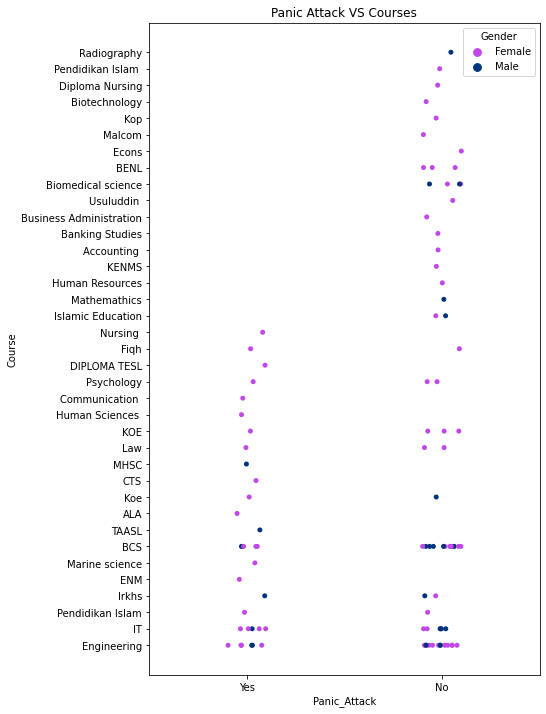

In [30]:
plt.figure(figsize=(7, 12))
ax = sns.stripplot(data= df, x = 'Panic_Attack', y = 'Course', hue = 'Gender',palette = ['#C147E9', '#00337C'])
ax.set_title('Panic Attack VS Courses')

**Panic Attack vs Course** <br>
Here are some of the stats:
* Males are less prone to experiencing panic attacks as compared to females.
* Approximately 37.5% of Engineering students experience panic attacks.
* About 62.5% of IT students experience panic attacks.
* About 18% of BCS students experience panic attacks.

Let's look at the age distribution.

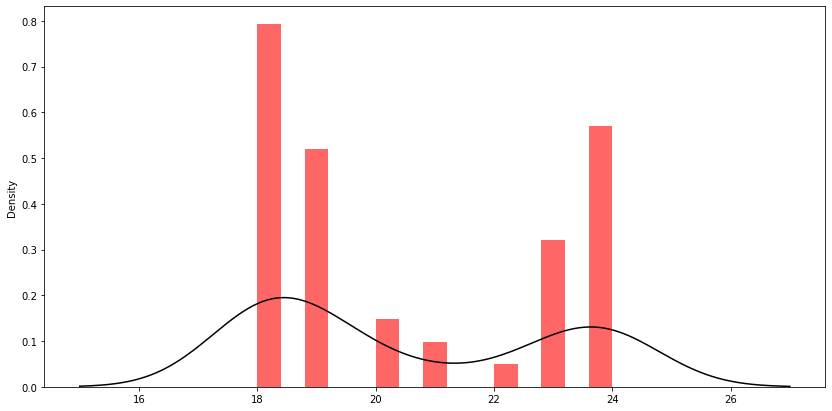

In [31]:
plt.figure(figsize=(14,7))
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
df["Age"].plot(kind='density', color='black')
plt.show()

With above info, we can say that:
* We have students from ages between 18 - 24.
* We do not have much responses from students aged 20-23.

Let's analyse various parameters( Depression, Anxiety, Panic_Attack ) yearwise.

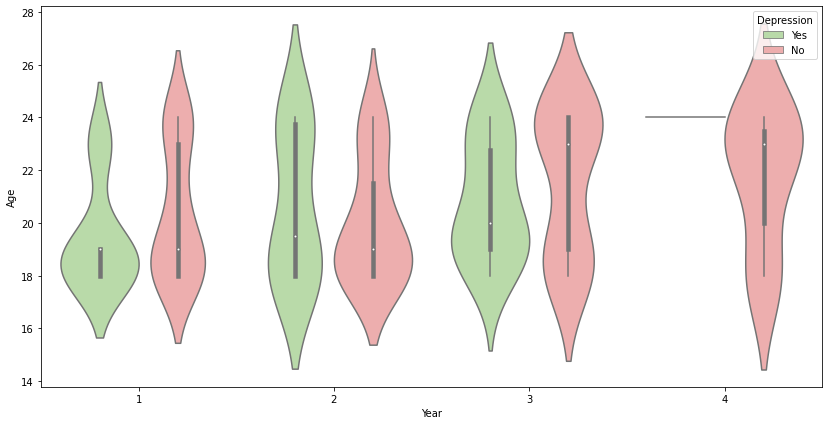

In [32]:
plt.figure(figsize=(14,7))
sns.violinplot(data=df, x = 'Year', y = 'Age',  hue = "Depression", palette = ['#B6E2A1', '#F7A4A4'])
plt.show()

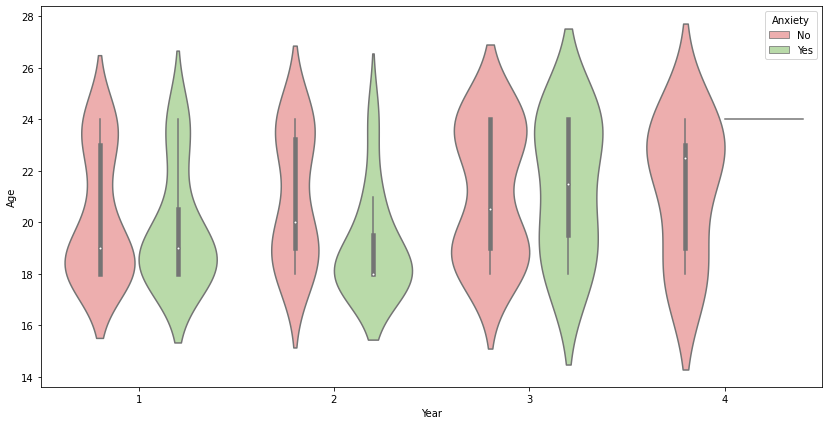

In [33]:
plt.figure(figsize=(14,7))
sns.violinplot(data=df, x = 'Year', y = 'Age',  hue = "Anxiety", palette = ['#F7A4A4', '#B6E2A1'])
plt.show()

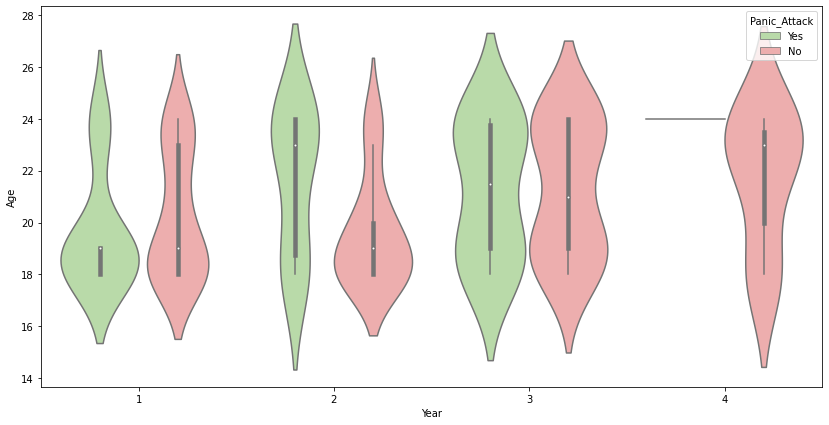

In [34]:
plt.figure(figsize=(14,7))
sns.violinplot(data=df, x = 'Year', y = 'Age',  hue = "Panic_Attack", palette = ['#B6E2A1', '#F7A4A4'])
plt.show()

From the plots above, We can say that:
* Year 4 students do not experience Depression, Anxiety or Panic Attacks except for those who are aged 24
* Year 3 has a versatile distribution of students. Mixed reviews.
* Year 1 students aged between 18 - 20 experience the most amongst depression, anxiety, panic attacks.
* Year 3 students are more anxiety prone.

###### 4.2 Does CGPA affect mental health? Let's find out!

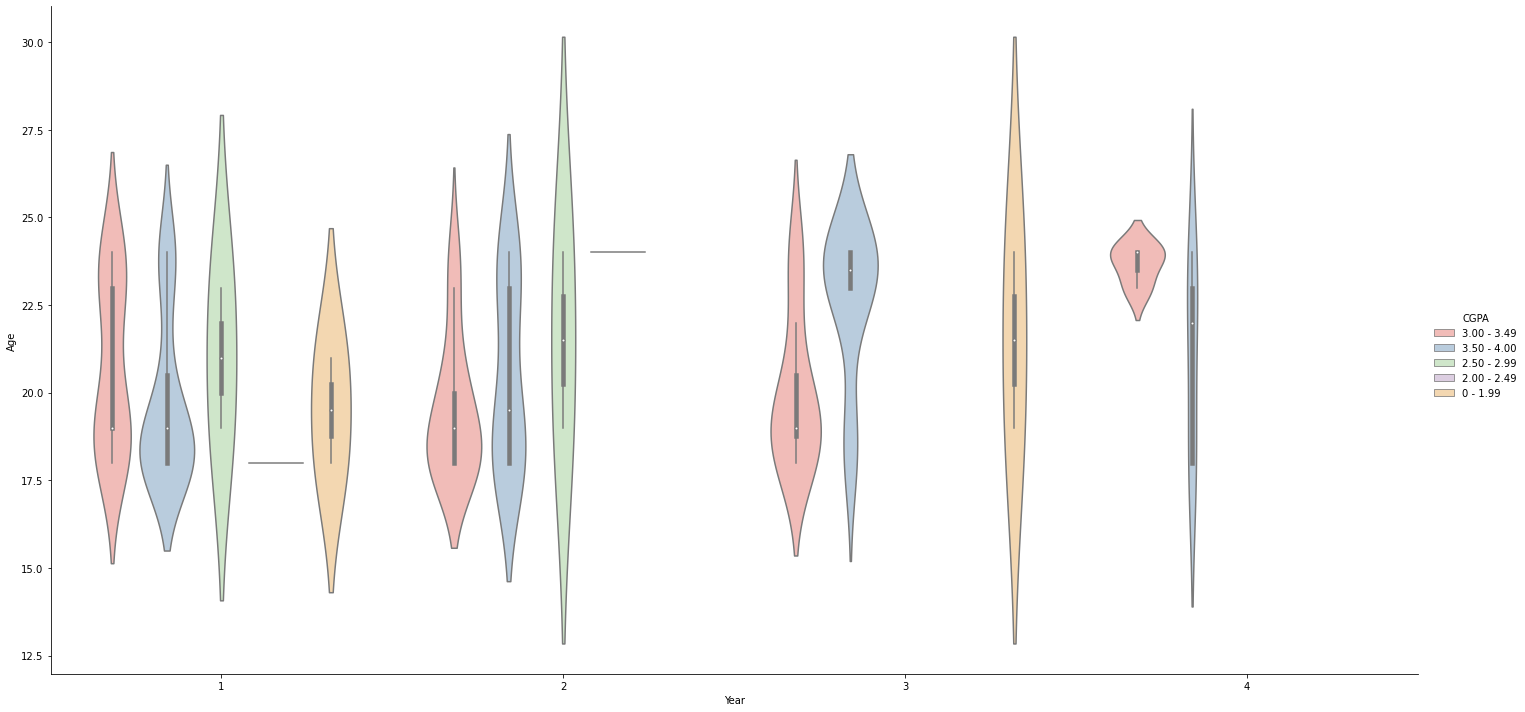

In [35]:
sns.catplot(data=df, x="Year", y="Age", hue="CGPA", kind="violin", palette="Pastel1",height=10,aspect=2)

From the plots above, We can say that:
* Year 3 and 4 students perform lower CGPA but still they have slight or no mental health problems.
* Many Year 3 Students have thier GPAs under 2.0. and Year 4 students below the age of 23 have perform well in Academics rather compared to older students.
* Students from Year 1 and Year 2 perform academically better having their GPAs above 2.5.
* Year 1 students aged 18- 20 despite having decent GPAs experience mental breakdowns. How is that possible? Maybe self-doubt, imposter syndrome, etc. (Just an assumption)

Up next I will plot the classic correlation heatmap matrix with a few significant columns.

<AxesSubplot:>

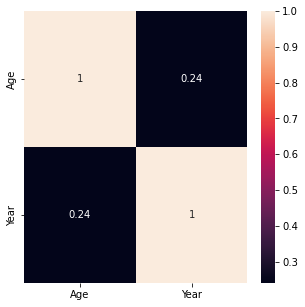

In [36]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(5,5))  
sns.heatmap(corrmat,annot=True, cmap=None)

No way this is going to help with our findings!

### 5. Data Preprocessing

* We will perform label encoding to the columns (CGPA, Depression, Anxiety, Panick_Attack) to get unique numerical value to each attribute.
* I think we do not require Date_Time because this data was collected on same day and time it doesn't contribute anything for our analysis, so we'll drop it out.
* Assigning labels and targets.
* Hypothesis Testing

In [37]:
df.drop('Date_Time', axis=1, inplace=True)

In [38]:
df.head()

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,IT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns= [x for x in df.columns if df.dtypes[x] == 'object']
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])
df.head()

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,0,18.0,14,1,3,0,1,0,1,0
1,1,21.0,20,2,3,0,0,1,0,0
2,1,19.0,18,1,3,0,1,1,1,0
3,0,22.0,25,3,3,1,1,0,0,0
4,1,23.0,29,4,3,0,0,0,0,0


<AxesSubplot:>

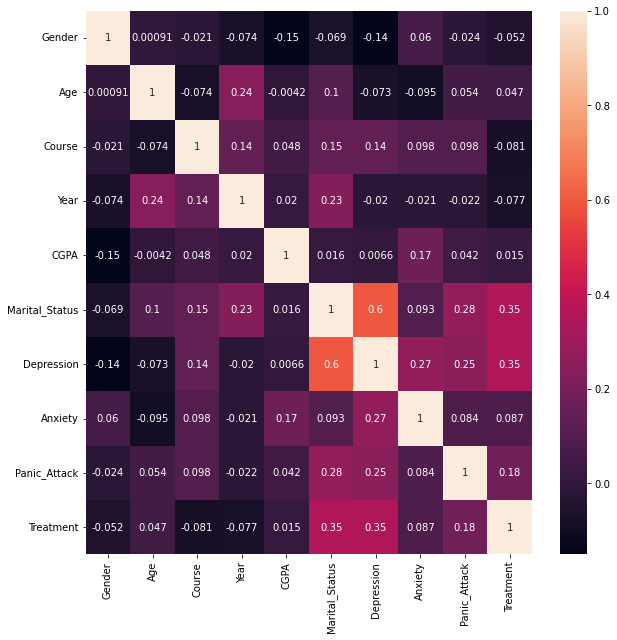

In [40]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat,annot=True, cmap=None)

From the above heatmap correlated matrix, We can say that:
* Marital_Status shows a close association with Depression.
* Depression. Anxiety, Panick_Attack show a significant correlation.
* Medical assistance(Treatment) shows a slight correlation with Marital_Status

###### 5.1 How much of Marital status affect the mental health of students?

In [41]:
df.Marital_Status.value_counts()

0    85
1    16
Name: Marital_Status, dtype: int64

In [42]:
df.Marital_Status.groupby(df['Depression']).value_counts()

Depression  Marital_Status
0           0                 66
1           0                 19
            1                 16
Name: Marital_Status, dtype: int64

In [43]:
df.Marital_Status.groupby(df['Anxiety']).value_counts()

Anxiety  Marital_Status
0        0                 58
         1                  9
1        0                 27
         1                  7
Name: Marital_Status, dtype: int64

In [44]:
df.Marital_Status.groupby(df['Panic_Attack']).value_counts()

Panic_Attack  Marital_Status
0             0                 62
              1                  6
1             0                 23
              1                 10
Name: Marital_Status, dtype: int64

From the above analysis matrix, We can say that:
* Marital_Status shows a close association with Depression, 16 out of 16 Married students have depression.
* Marital_Status shows a that 7 out of 16 Married students have Anxiety.
* Marital_Status shows a that 10 out of 16 Married students are having Panic Attack.

We found that Married students are more likely to have poor mental Health. 16 out of 16 married Students have either of mental disease(Depression, Anxiety, Panic Attack).

### 6. Model Selection

For Model Selection, I will be building pipelines of five different classifiers and select the one with the best fit results.

*In this section:*

* Split data into training and testing sets
* Assigning targets and features
* The model pipelines with preprocessing.
* Fitting the training set to the various models.
* Getting the confusion matrix and accuracy scores.
* Choosing the best classifier 

In [45]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler, OneHotEncoder
import pandas as pd
from sklearn.utils import all_estimators

In [46]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

###### 6.1 Let's first split our data into X features and y target. This time we will be using `CGPA` as Target Variable

In [47]:
X = df.drop(["CGPA"],axis=1)
y = df["CGPA"]

To ensure the data gets split the same way, use the same random_state in each of the two splits.

In [48]:
#splitting data into training and testing set.
X_train,X_test, y_train,y_test = train_test_split(X, y ,test_size=0.3, random_state=42,)

In [49]:
#Print the index of the features after each step.

def print_feature_indexes(preprocessing, X):
    
    # Copy the original dataframe to make sure you don't lose the original data
    X_copy = X.copy()

    for index, step in enumerate(preprocessing):
        # Fit the transformer to the modified dataframe
        step.fit(X_copy) 

        # Get the name of the features after training the transformer
        feature_names = [name.split("__")[-1] for name in step.get_feature_names_out()]

        # Create the new dataframe with the features provided by the transformer 
        X_copy = pd.DataFrame(step.transform(X_copy), columns=feature_names)

        print(f"After step {index + 1}, the index of the features are: {list(enumerate(feature_names))}")


In [50]:
imputer = make_column_transformer(
    (SimpleImputer(strategy="median"), [1,3]),
    (SimpleImputer(strategy="most_frequent"), [0,2,4,5,6,7,8])
)
normalizer = make_column_transformer(
    (MinMaxScaler(feature_range=(0, 1)), [0, 1]), 
    remainder="passthrough"
)

encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), [2,3,4,5,6,7,8]),
    remainder="passthrough"
)

In [51]:
preprocessing = make_pipeline(imputer, normalizer, encoder)
preprocessing

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(transformers=[('simpleimputer-1',
                                                  SimpleImputer(strategy='median'),
                                                  [1, 3]),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 2, 4, 5, 6, 7, 8])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(), [0, 1])])),
                ('columntransformer-3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [2, 3, 4, 5, 6, 7, 8])]))])

In [52]:
#Create a pipeline for each classifiers.
#This way it will be easier to select classifier during Model Evalution
clfL = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", LogisticRegression(random_state=42))]
)
clfD = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", DecisionTreeClassifier(criterion="entropy",random_state=42))]
)
clfD2 = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", DecisionTreeClassifier(random_state=42))]
)
clfR = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", RandomForestClassifier())]
)
clfS = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", SVC())]
)

In [53]:
#A quick way to select your model.

# List of all the pipelines 
pipelines = [clfL, clfD, clfD2, clfR,clfS]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree entropy',2:'Decision Tree gini' ,3: 'RandomForest', 4: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))


Logistic Regression: 0.614286 
Decision Tree entropy: 0.485714 
Decision Tree gini: 0.542857 
RandomForest: 0.571429 
SVC: 0.571429 


Now we can say that:
* Logistic Regression have the best cross-validation score with 0.614286.
* Logistic Regression may be a good choice for an accurate model.

In [54]:
#taking look at the test set with Logistic Regression
pred_rfc = clfL.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.6451612903225806


In [55]:
#Initialization and Fitting the data using Random Forrest classifier
RF_model = RandomForestClassifier() #Initialising RandomForestClassifier() in RF_Model.
RF_model.fit(X_train, y_train) #Fitting the model with training data.

#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy
clfR.fit(X_train, y_train)
print("Random Forest Model score: %.3f" % clfR.score(X_test, y_test))
accuracyR = accuracy_score(y_test,clfR.predict(X_test))
print("Random Forest's accuracy score:",accuracyR)

predictions=clfL.predict(X_test)
accuracy = accuracy_score(y_test,clfL.predict(X_test))
print("Logistic Regression's accuracy score:",accuracy)

Random Forest Model score: 0.419
Random Forest's accuracy score: 0.41935483870967744
Logistic Regression's accuracy score: 0.6451612903225806


In [56]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Logistic Regression Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Logistic Regression Results *********
Accuracy    :  0.6451612903225806
Recall      :  0.6451612903225806
Precision   :  0.6414392059553351
F1 Score    :  0.6451612903225806


In [57]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.85      0.65      0.73        17
           4       0.50      0.82      0.62        11

    accuracy                           0.65        31
   macro avg       0.27      0.29      0.27        31
weighted avg       0.64      0.65      0.62        31



<AxesSubplot:>

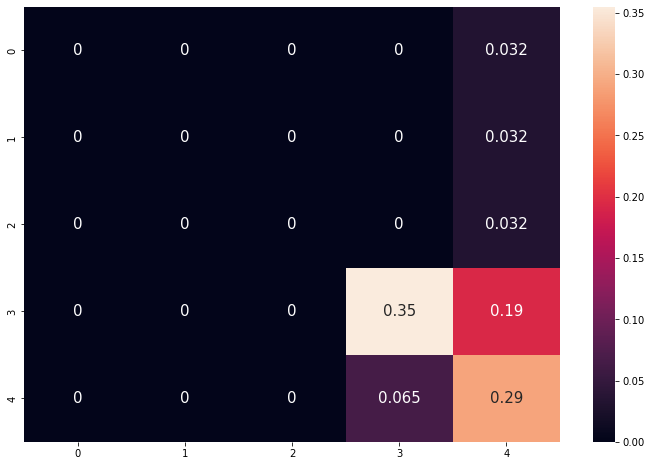

In [58]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=None,annot = True, annot_kws = {'size':15})

Let's carry out the more advanced pipeline. 

######  6.2 This time we will take `Marital_Status` feature as a target variable.

In [59]:
X = df.drop(["Marital_Status"],axis=1)
y = df["Marital_Status"]

In [60]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [61]:
imputer2 = make_column_transformer(
    (SimpleImputer(strategy="median"), [1,3]),
    (SimpleImputer(strategy="most_frequent"), [0,2,5,6,7,8])
)
normalizer2 = make_column_transformer(
    (MinMaxScaler(feature_range=(0, 1)), [0, 1]), 
    remainder="passthrough"
)

encoder2 = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), [2,3,4,5,6,7]),
    remainder="passthrough"
)

In [62]:
preprocessing2 = make_pipeline(imputer2, normalizer2, encoder2)

In [63]:
#Create a pipeline for each classifiers.
#This way it will be easier to select classifier during Model Evalution
clfL2 = Pipeline(
    steps=[("preprocessor", preprocessing2), ("classifier", LogisticRegression(random_state=42))]
)
clfD2 = Pipeline(
    steps=[("preprocessor", preprocessing2), ("classifier", DecisionTreeClassifier(criterion="entropy",random_state=42))]
)
clfD22 = Pipeline(
    steps=[("preprocessor", preprocessing2), ("classifier", DecisionTreeClassifier(random_state=42))]
)
clfR2 = Pipeline(
    steps=[("preprocessor", preprocessing2), ("classifier", RandomForestClassifier())]
)
clfS2 = Pipeline(
    steps=[("preprocessor", preprocessing2), ("classifier", SVC())]
)

In [64]:
# List of all the pipelines
pipelines = [clfL2, clfD2, clfD22, clfR2,clfS2]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree entropy',2:'Decision Tree gini' ,3: 'RandomForest', 4: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.900000 
Decision Tree entropy: 0.885714 
Decision Tree gini: 0.885714 
RandomForest: 0.871429 
SVC: 0.828571 


Now we can say that:
* Logistic Regression have the best cross-validation score with 0.90.
* Logistic Regression may be a good choice for an accurate model.

######  6.3 This time we will take `Treatment` feature as a target variable.

In [65]:
X = df.drop(["Treatment"],axis=1)
y = df["Treatment"]

In [66]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [67]:
imputer = make_column_transformer(
    (SimpleImputer(strategy="median"), [1,3]),
    (SimpleImputer(strategy="most_frequent"), [0,2,4,5,6,7,8])
)
normalizer = make_column_transformer(
    (MinMaxScaler(feature_range=(0, 1)), [0,1]), 
    remainder="passthrough"
)

encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), [2,3,4,5,6,7,8]),
    remainder="passthrough"
)

In [68]:
preprocessing = make_pipeline(imputer, normalizer, encoder)

In [69]:
clfL = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", LogisticRegression(random_state=42))]
)
clfD = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", DecisionTreeClassifier(criterion="entropy",random_state=42))]
)
clfD2 = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", DecisionTreeClassifier(random_state=42))]
)
clfR = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", RandomForestClassifier())]
)
clfS = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", SVC())]
)

In [70]:
# List of all the pipelines
pipelines = [clfL, clfD, clfD2, clfR,clfS]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree entropy',2:'Decision Tree gini' ,3: 'RandomForest', 4: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.942857 
Decision Tree entropy: 0.857143 
Decision Tree gini: 0.900000 
RandomForest: 0.928571 
SVC: 0.942857 


In [71]:
#taking look at the test set with Logistic Regression
pred_rfc = clfL.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.9354838709677419


###### 6.4 This time we will take `Depression` feature as a target variable.

In [72]:
X = df.drop(["Depression"],axis=1)
y = df["Depression"]

In [73]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [74]:
imputer = make_column_transformer(
    (SimpleImputer(strategy="median"), [1,3]),
    (SimpleImputer(strategy="most_frequent"), [0,2,4,5,6,7,8])
)
normalizer = make_column_transformer(
    (MinMaxScaler(feature_range=(0, 1)), [0,1]), 
    remainder="passthrough"
)

encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), [2,3,4,5,6,7,8]),
    remainder="passthrough"
)

In [75]:
preprocessing = make_pipeline(imputer, normalizer, encoder)

In [76]:
#Create a pipeline for each classifiers.
#This way it will be easier to select classifier during Model Evalution
clfL = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", LogisticRegression(random_state=42))]
)
clfD = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", DecisionTreeClassifier(criterion="entropy",random_state=42))]
)
clfD2 = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", DecisionTreeClassifier(random_state=42))]
)
clfR = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", RandomForestClassifier())]
)
clfS = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", SVC())]
)

In [77]:
# List of all the pipelines
pipelines = [clfL, clfD, clfD2, clfR,clfS]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree entropy',2:'Decision Tree gini' ,3: 'RandomForest', 4: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.871429 
Decision Tree entropy: 0.857143 
Decision Tree gini: 0.857143 
RandomForest: 0.842857 
SVC: 0.828571 


In [78]:
#taking look at the test set with Logistic Regression
pred_rfc = clfL.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.7419354838709677


###### 6.5 This time we will take `Anxiety` feature as a target variable.

In [79]:
X = df.drop(["Anxiety"],axis=1)
y = df["Anxiety"]

In [80]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [81]:
imputer = make_column_transformer(
    (SimpleImputer(strategy="median"), [1,3]),
    (SimpleImputer(strategy="most_frequent"), [0,2,4,5,6,7,8])
)
normalizer = make_column_transformer(
    (MinMaxScaler(feature_range=(0, 1)), [0,1]), 
    remainder="passthrough"
)

encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), [2,3,4,5,6,7,8]),
    remainder="passthrough"
)

In [82]:
preprocessing = make_pipeline(imputer, normalizer, encoder)

In [83]:
#Create a pipeline for each classifiers.
#This way it will be easier to select classifier during Model Evalution
clfL = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", LogisticRegression(random_state=42))]
)
clfD = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", DecisionTreeClassifier(criterion="entropy",random_state=42))]
)
clfD2 = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", DecisionTreeClassifier(random_state=42))]
)
clfR = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", RandomForestClassifier())]
)
clfS = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", SVC())]
)

In [84]:
# List of all the pipelines
pipelines = [clfL, clfD, clfD2, clfR,clfS]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree entropy',2:'Decision Tree gini' ,3: 'RandomForest', 4: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.657143 
Decision Tree entropy: 0.500000 
Decision Tree gini: 0.514286 
RandomForest: 0.657143 
SVC: 0.671429 


In [85]:
#taking look at the test set with Logistic Regression
pred_rfc = clfL.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.5483870967741935


###### 6.6 This time we will take `Panic_Attack` feature as a target variable.

In [86]:
X = df.drop(["Panic_Attack"],axis=1)
y = df["Panic_Attack"]

In [87]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [88]:
imputer = make_column_transformer(
    (SimpleImputer(strategy="median"), [1,3]),
    (SimpleImputer(strategy="most_frequent"), [0,2,4,5,6,7,8])
)
normalizer = make_column_transformer(
    (MinMaxScaler(feature_range=(0, 1)), [0,1]), 
    remainder="passthrough"
)

encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), [2,3,4,5,6,7,8]),
    remainder="passthrough"
)

In [89]:
preprocessing = make_pipeline(imputer, normalizer, encoder)

In [90]:
#Create a pipeline for each classifiers.
#This way it will be easier to select classifier during Model Evalution
clfL = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", LogisticRegression(random_state=42))]
)
clfD = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", DecisionTreeClassifier(criterion="entropy",random_state=42))]
)
clfD2 = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", DecisionTreeClassifier(random_state=42))]
)
clfR = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", RandomForestClassifier())]
)
clfS = Pipeline(
    steps=[("preprocessor", preprocessing), ("classifier", SVC())]
)

In [91]:
# List of all the pipelines
pipelines = [clfL, clfD, clfD2, clfR,clfS]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree entropy',2:'Decision Tree gini' ,3: 'RandomForest', 4: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.657143 
Decision Tree entropy: 0.571429 
Decision Tree gini: 0.528571 
RandomForest: 0.600000 
SVC: 0.642857 


In [92]:
#taking look at the test set with SVC
pred_rfc = clfS.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.6774193548387096


In [93]:
#taking look at the test set with Logistic Regression Classifier
pred_rfc = clfL.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.6451612903225806


###### 6.7 From above findings, we can say that:
* `Logistic Regression` Classifier shows the best result among other classifiers.
* `SVC` model performs better than `Logistic Regression` when predicting `Panic_Attack`.
* `Random Forest` Classifier also have the potential to be a good choice for accurate model when data is sufficient and complicated.
* `Logistic Regression` is an accurate choice for model building with this limited amount of data.

###### 6.8 Further Exploration

* Collect more data for analysis and fitting model.
* Data need to be in more detailed.
* There was multiple features which was not giving any input for our model.
* Data should be collected in more precise way.

### 7. Conclusion:

I have summarized the study on `Student's Mental Health` over proportions of categorical outcomes. `Married` Student lead to negative results(Married students are more affected by the mental health) for students while also `Married` students tends to ask for more help(Treatment). With the advent of `mixed & confused` categorical data that no longer helps the model. Most crucially, `shortage` of data lead to some spurious results. Finally, `Logistic Regression` classifier framework that provide a better accuracy score for this analysis of many different types of outcomes.

### 8. Citations:

<a id="Section_1"></a>

[1] Eisenberg, D., Gollust, S. E., Golberstein, E., & Hefner, J. L. (2007). Prevalence and correlates of depression, anxiety, and suicidality among university students. American Journal of Orthopsychiatry, 77(4), 534–542.
<br>
<br>
<a id="Section_2"></a>
[2]Student Mental Analysis[EDA + ML]😁✨ - [Analysis By ANMOL BAJPA](https://www.kaggle.com/code/anmolbajpai/student-mental-analysis-eda-ml).
<br>
<br>
<a id="Section_3"></a>
[3] Anxiety From Wikipedia - [Anxiety](https://en.wikipedia.org/wiki/Anxiety).
<br>
<br>
<a id="Section_4"></a>
[4] Depression From Wikipedia - [Depression](https://en.wikipedia.org/wiki/Depression_(mood)).
<br>
<br>
<a id="Section_5"></a>
[5] Panic Attack From Wikipedia - [Panic Attack](https://en.wikipedia.org/wiki/Panic_attack).
<br>
<br>
<a id="Section_6"></a> 
[6] WHY MENTAL HEALTH IS IMPORTANT FOR STUDENTS? - [Article By manhattan School](https://www.themanthanschool.co.in/blog/why-mental-health-is-important-for-students/abs).

**Students Mental Health Analysis © Nikhil Sharma 2023**